# Basic 2-dimensional ODE solution

In [22]:
# This is a standard initalisation code - no need to change this
# It loads basic fast array code, plot library and ODE solver
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
%matplotlib inline
%config InlineBackend.figure_formats={'retina','png'}

## System definition

To solve the equations
$$
\begin{eqnarray*}
\frac{dx_1}{dt} &=& x_1 \\
\frac{dx_2}{dt} &=& -\sin x_2
\end{eqnarray*}
$$
which corresponds to the mathematical pendulum $\ddot{x} = -\omega^2 \sin x$ with $\omega=1$.

In [23]:
def f(t, X):
    x1 = X[0]
    x2 = X[1]
    return [ x2,
             -np.sin(x1) ]

## Simple solution

Let us just solve the equations for some initial conditions and plot the solution.

Note the message `'The solver successfully reached the end of the integration interval.'`. It is good to check that it is the case -- sometimes the solver fails to do this!

In [24]:
tspan = (0, 10) # time range for the solution
x0 = [0.0, 1.5]  # initial conditions

t_eval = np.linspace(tspan[0], tspan[1], num=100) # Make reported solution "smooth"
## Solve, and return solution at t_eval moments
xs = solve_ivp(f, tspan, x0, t_eval=t_eval)
xs

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 92
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.6565656

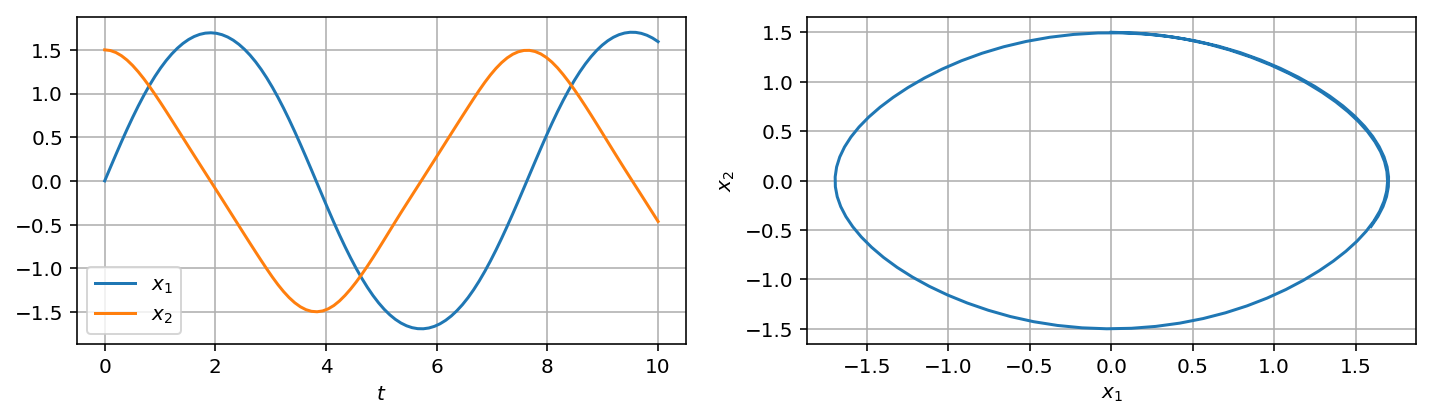

In [25]:
fig = plt.figure(figsize=(12,3))
ax1, ax2 = fig.subplots(1,2)

ax1.plot(xs.t, xs.y[0,:], label="$x_1$")
ax1.plot(xs.t, xs.y[1,:], label="$x_2$")
ax1.set_xlabel("$t$")
ax1.grid()
ax1.legend()

ax2.plot(xs.y[0,:], xs.y[1,:])
ax2.set_xlabel("$x_1$")
ax2.set_ylabel("$x_2$")
ax2.grid()

*Advanced programmers only:* For complicated situations there are many features of `solve_ivp` described in in [SciPy](https://www.scipy.org/) documentation [scipy.integrate.solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html?highlight=solve_ivp#scipy.integrate.solve_ivp)

## Basic analysis

Let us plot the direction field for the system.

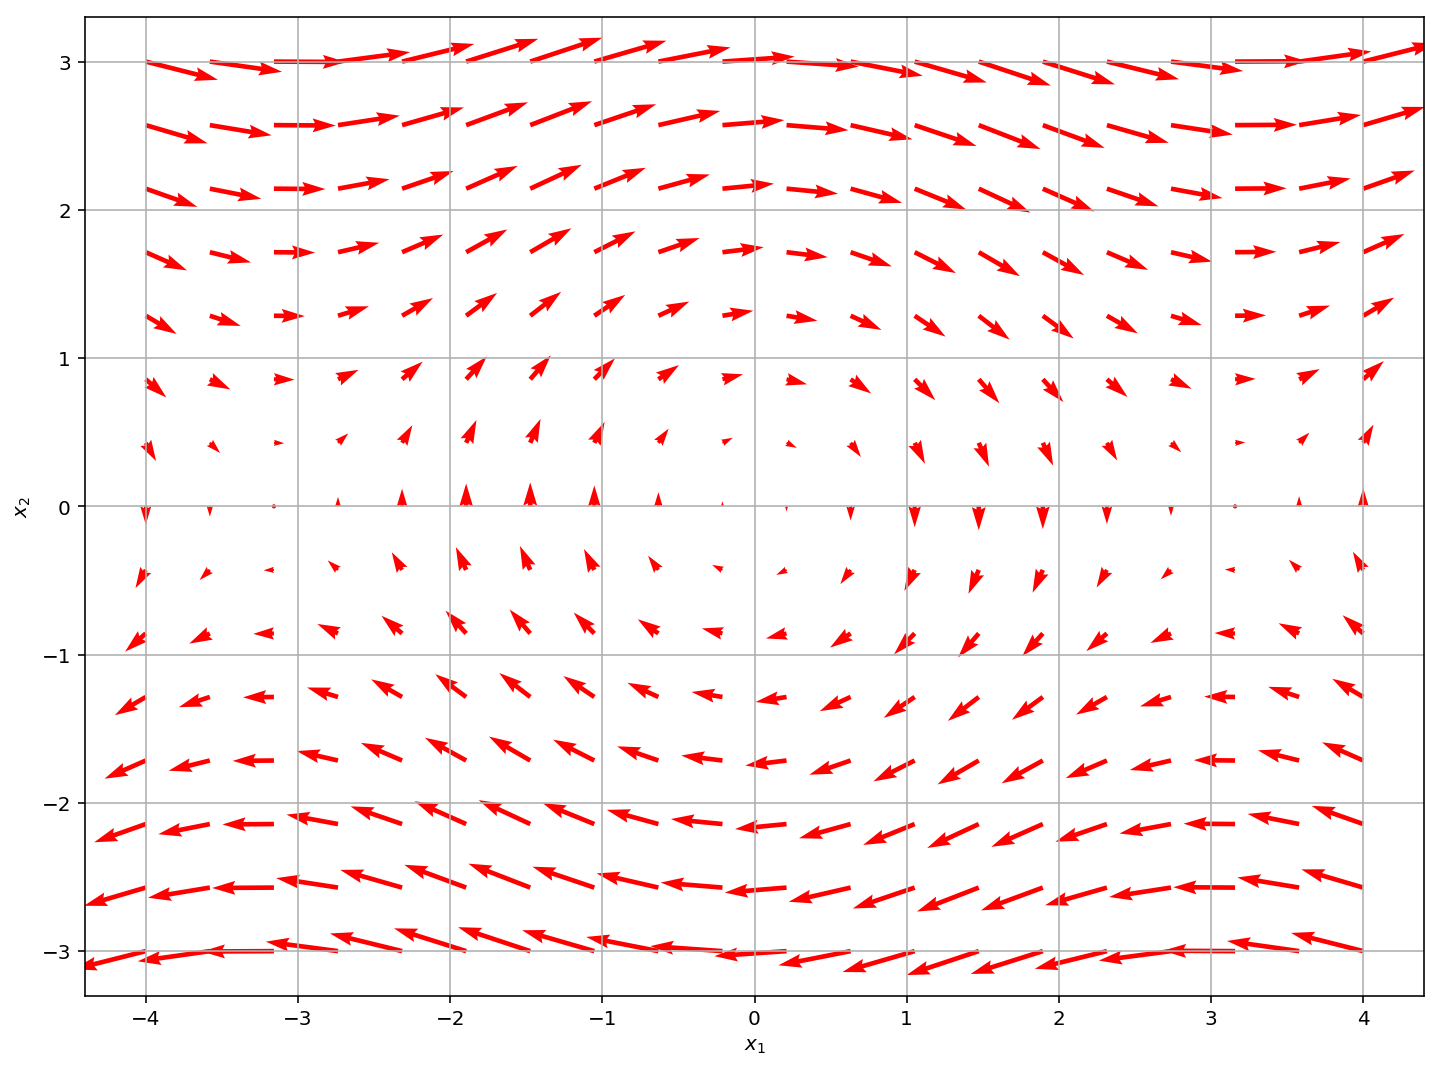

In [8]:
x1range = np.linspace(-4, 4, num=20) # Select the required x_1 range
x2range = np.linspace(-3, 3, num=15) # Select the required x_2 range
t = 0

# Fill the components of the vector field in the xrid points
U = np.zeros([len(x2range), len(x1range)])
V = np.zeros_like(U)
for i in range(len(x2range)):
    for j in range(len(x1range)):
        U[i,j], V[i,j] = f(t, [x1range[j], x2range[i]])

fig = plt.figure(figsize=(12,9))
ax = fig.subplots(1)

ax.quiver(x1range, x2range, U, V, color='r')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.grid()

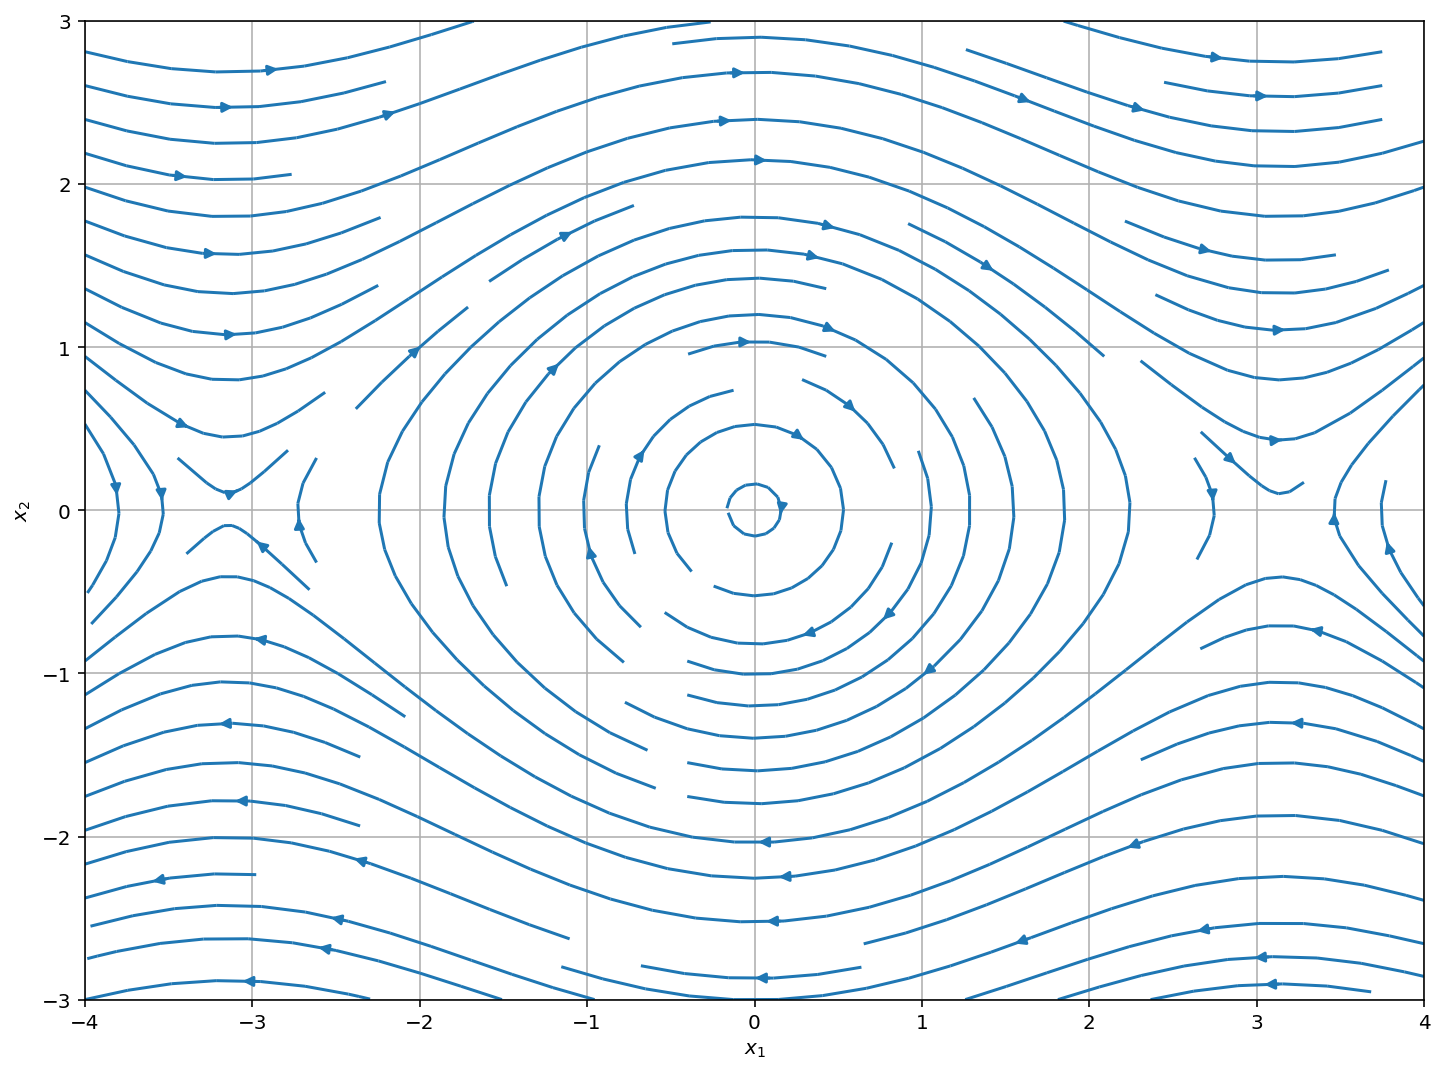

In [15]:
t = 0

# This evil python magic is synonymous to the job in the prevoius cell 
X2, X1 = np.mgrid[-3:3:300j, -4:4:300j]
U, V = f(t, [X1, X2])

fig2 = plt.figure(figsize=(12,9))
ax2 = fig2.subplots(1)

ax2.streamplot(X1, X2, U, V)
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')
ax2.grid()

## Trajectories

Let us plot the trajectory for the same solution. Circle and box mark the initial and final points.

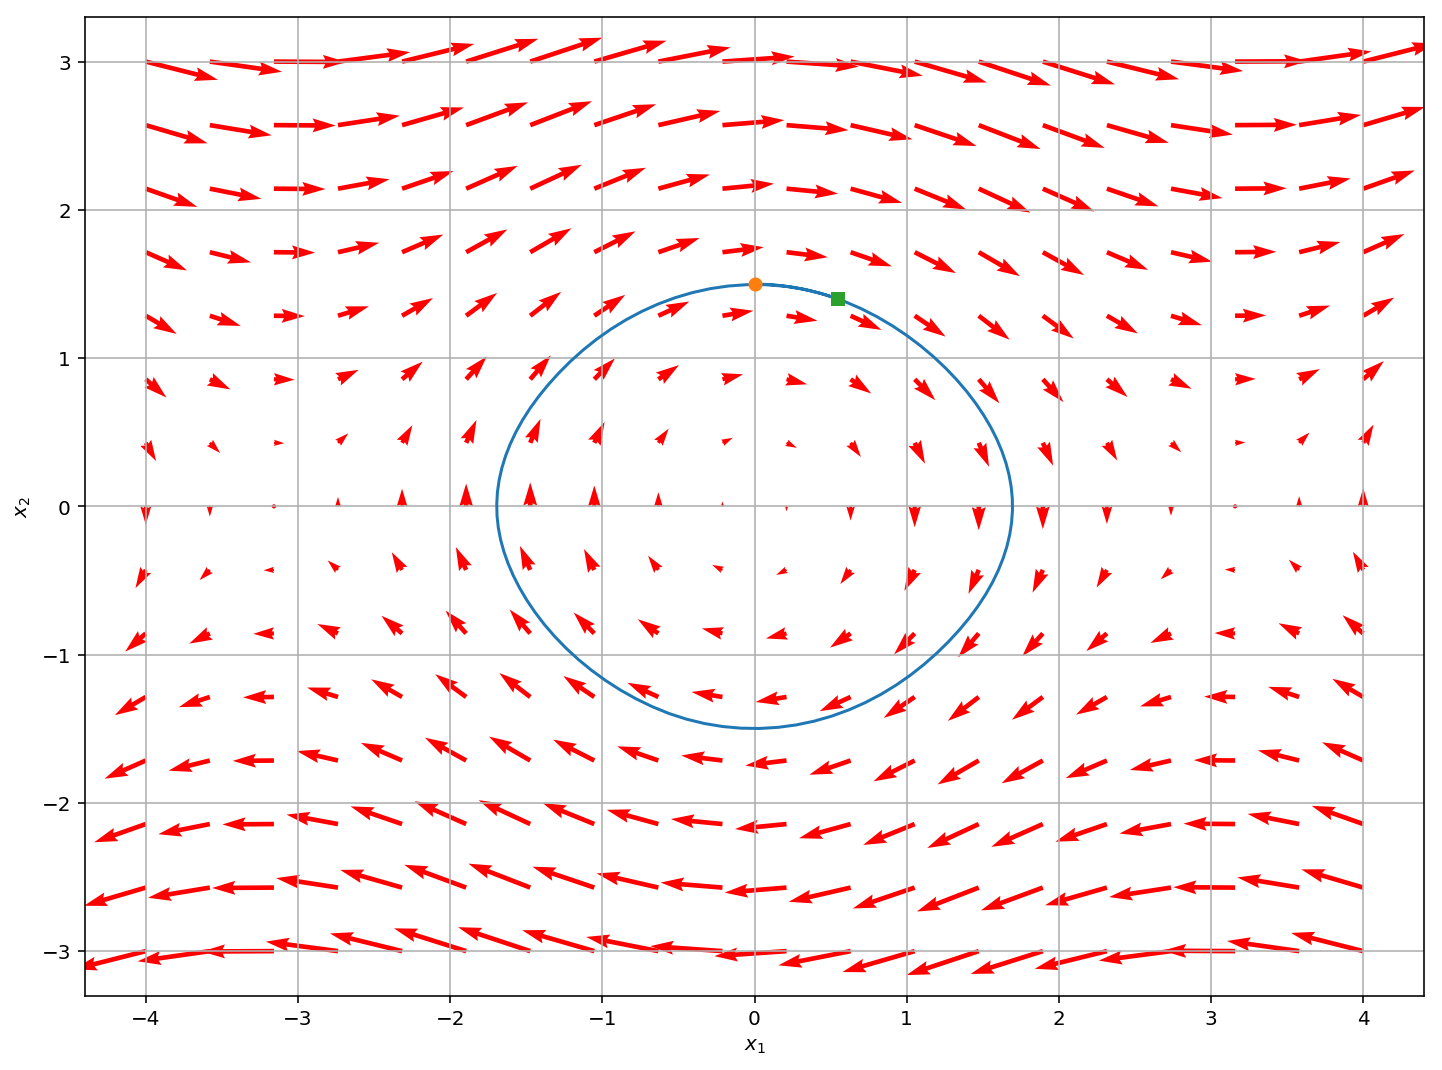

In [17]:
tspan = (0, 8)
x0 = [0.0, 1.5]

t_eval = np.linspace(tspan[0], tspan[1], num=100) # Make reported solution "smooth"
xs = solve_ivp(f, tspan, x0, t_eval=t_eval)

## Uncomment the following line if you do not want the direction field plot
# fig, ax = plt.subplots(1)

ax.plot(xs.y[0,:], xs.y[1,:])
ax.plot(xs.y[0,0], xs.y[1,0], 'o')
ax.plot(xs.y[0,-1], xs.y[1,-1], 's')
fig

Let us add one more trajectory.

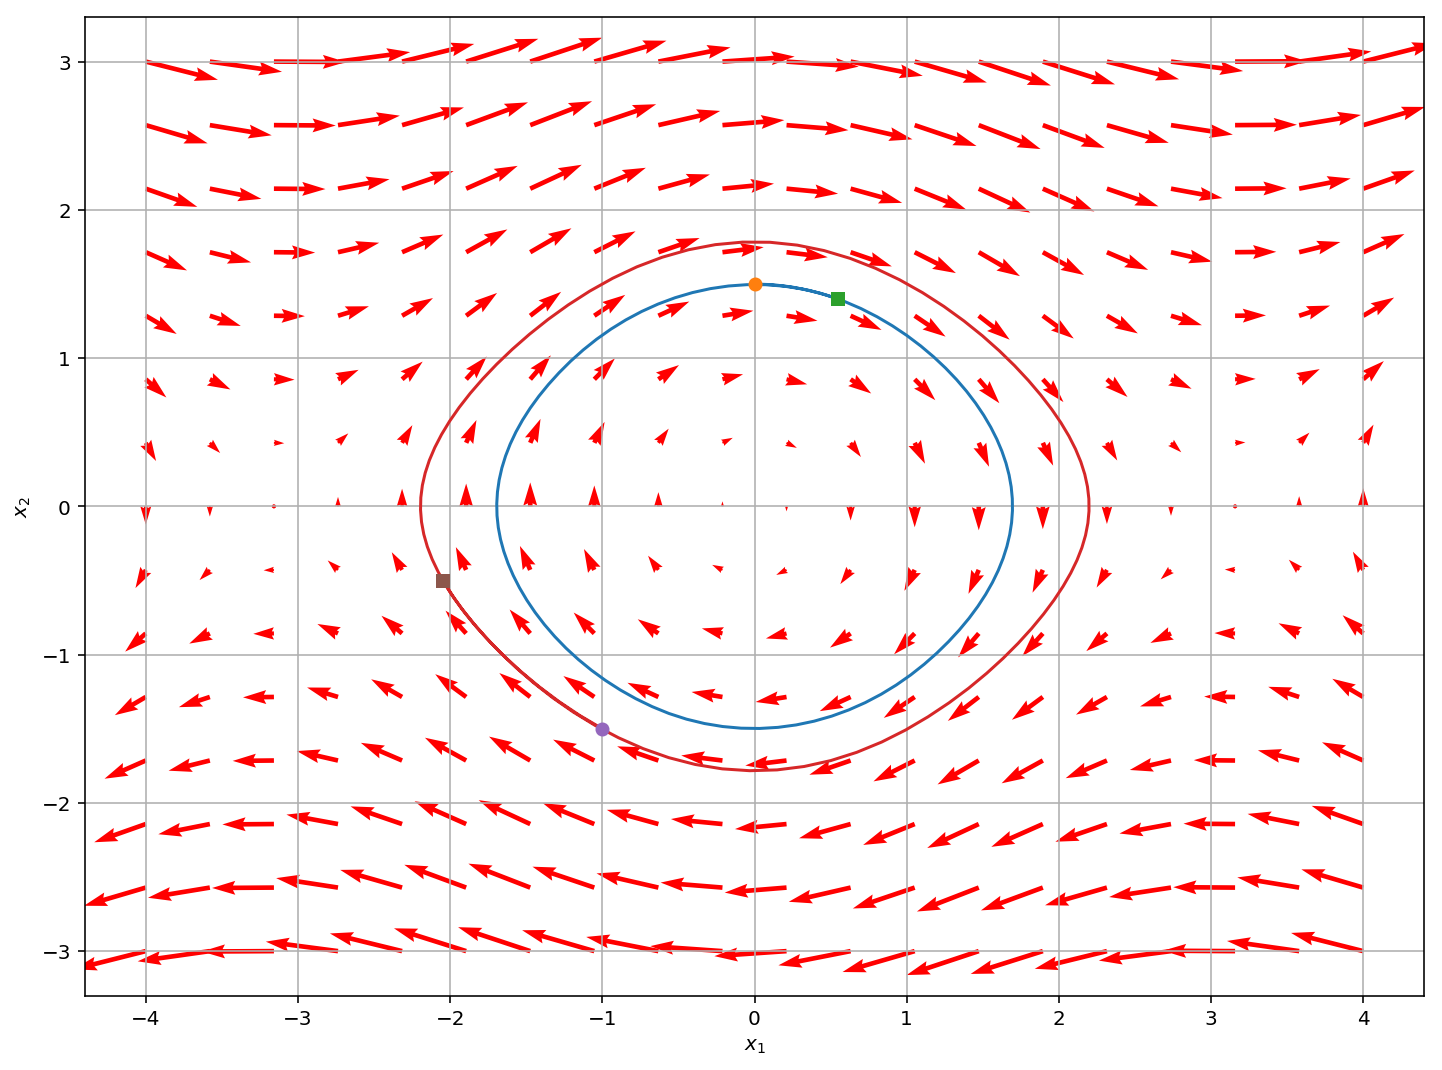

In [18]:
tspan = (0, 10)
x0 = [-1., -1.5]

## Uncomment the following line if you do not want the direction field plot
# fig, ax = plt.subplots(1)

t_eval = np.linspace(tspan[0], tspan[1], num=100) # Make reported solution "smooth"
xs = solve_ivp(f, tspan, x0, t_eval=t_eval)

ax.plot(xs.y[0,:], xs.y[1,:])
ax.plot(xs.y[0,0], xs.y[1,0], 'o')
ax.plot(xs.y[0,-1], xs.y[1,-1], 's')
fig

Let us plot several more at once.

Some solve_ivp features are used here to stop the integration exactly at the boundaries.

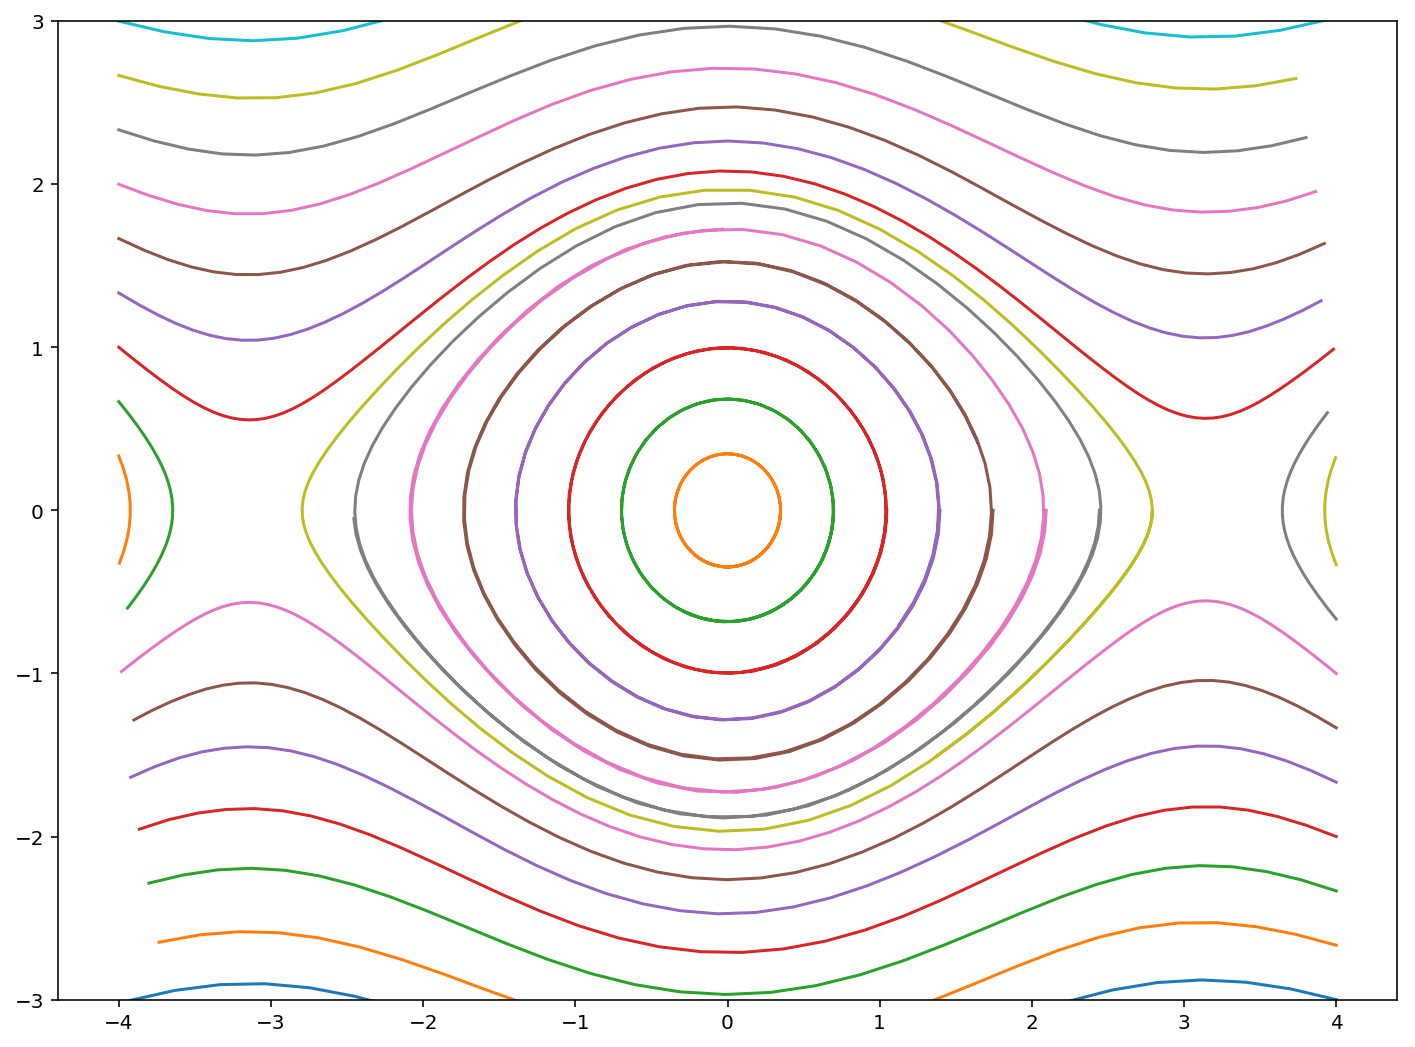

In [18]:
fig = plt.figure(figsize=(12,9))
ax = fig.subplots(1)
ax.set_ylim(-3,3)

def xmax_event(t, x):
    return x[0]-4
xmax_event.terminal = True
xmax_event.direction = +1
def xmin_event(t, x):
    return x[0]+4
xmin_event.terminal = True
xmin_event.direction = -1

# Give a list of initial positions and integration times [x1,x2,tmax]
def plot_trajectory(x10,x20,tmax):
    tspan = (0, tmax)
    t_eval = np.linspace(tspan[0], tspan[1], num=100)
    t_eval = np.linspace(tspan[0], tspan[1], num=100)
    x0 = [x10, x20]
    xs = solve_ivp(f, tspan, x0, t_eval=t_eval, events=[xmax_event,xmin_event], rtol=1e-3, atol=1e-6)
    ax.plot(xs.y[0,:], xs.y[1,:])

for x10 in np.linspace(0,np.pi,10):
    plot_trajectory(x10,0,15)
for x20 in np.linspace(0,3,10):
    plot_trajectory(-4,x20,10)
for x20 in np.linspace(-3,0,10):
    plot_trajectory(4,x20,10)

#plot_trajectory(0,2,20)

### Numerical nuances

Let us look closer at the solution starting from (0,2) point

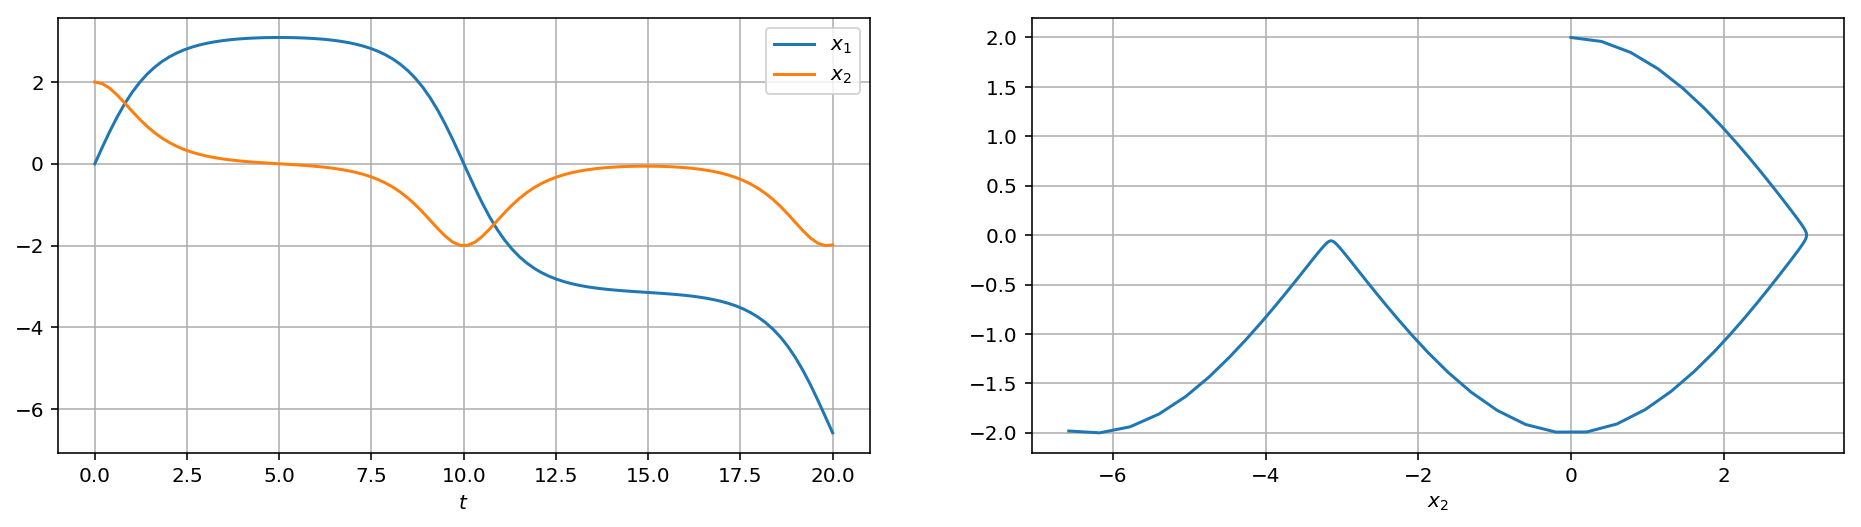

In [21]:
tspan = (0, 20) # time range for the solution
x0 = [0.0, 2]  # initial conditions

t_eval = np.linspace(tspan[0], tspan[1], num=100) # Make reported solution "smooth"
## Solve, and return solution at t_eval moments
xs = solve_ivp(f, tspan, x0, t_eval=t_eval, rtol=1e-3, atol=1e-6)

fig2 = plt.figure(figsize=(16,4))
ax1, ax2 = fig2.subplots(1,2)

ax1.plot(xs.t, xs.y[0,:], label="$x_1$")
ax1.plot(xs.t, xs.y[1,:], label="$x_2$")
ax1.set_xlabel("$t$")
ax1.grid()
ax1.legend()

ax2.plot(xs.y[0,:], xs.y[1,:], label="$x_2$")
ax2.set_xlabel("$x_1$")
ax2.set_xlabel("$x_2$")
ax2.grid()

Play with absolute and relative tolerances!